In [1]:
import pandas as pd

df=pd.read_csv(r'C:\Documents\Project Scrapping Insstagram\instagram_data.csv')

In [2]:
df['media_id'][0].split("' ")[3][9:73]

'datetime.datetime(2023, 11, 10, 11, 9, 46, tzinfo=datetime.timez'

In [3]:
import string
import datetime
def get_date(j):
    x=j.split("' ")[3][9:]
    last=x.find('media_type')
    date=j.split("' ")[3][9:last+7]
    date=date.replace("datetime.datetime(", "").replace(");", "").replace("tzinfo=datetime.timezone.utc", "")[:-2]
    if len(date)>=20:
        date=datetime.datetime.strptime(date,"%Y, %m, %d, %H, %M, %S")
    else:
        date=datetime.datetime.strptime(date,"%Y, %m, %d, %H, %M")
    return date


In [4]:
import re
def get_comment(j):
    start_com=j.split("' ")[4].find('comment_count')
    comment_count=int([''.join(re.findall('\d',j.split("' ")[4][start_com:].split()[0]))][0])
    return comment_count

In [5]:
def get_view(j):
    start_view=j.split("' ")[5].find('view_count')
    end_view=j.split("' ")[5].find('video_duration')
    view_count=int([''.join(re.findall('\d',j.split("' ")[5][start_view:end_view-1]))][0])
    return view_count

In [6]:
view_count=df['media_id'].apply(get_view)
post_date=df['media_id'].apply(get_date)
comment_count=df['media_id'].apply(get_comment)

In [7]:
df['view_count']=view_count
df['post_date']=post_date
df['comment_count']=comment_count

In [22]:
import plotly.express as px
px.line(df['post_date'].apply(lambda x:x.hour).value_counts().sort_index(),title='Comment Timeseries Daily')

In [25]:
px.pie(names=df['user_private'].value_counts().keys(),values=df['user_private'].value_counts().values,title='Private Account Comment Profile Proportion')

In [23]:
df['hour']=df['post_date'].apply(lambda x:x.hour)
df['view_count']=df['view_count'].astype('int')
px.line(df[['view_count','hour']].groupby('hour').mean(),title='View Count Timeseries Daily')

In [29]:
df.sort_values('view_count',ascending=False)

,Unnamed: 0,no,media_id,user,user_private,fullname,text,timestamp,view_count,post_date,comment_count,hour
270,270,270,pk='3211860806056849742' id='32118608060568497...,aka.yayar,False,Kntnotnot,@semak_ajaa lek gini caranya nyaleg,2023-10-17 22:01:07+00:00,27112,2023-10-12 09:46:17,18,9
257,257,257,pk='3211860806056849742' id='32118608060568497...,lapaknyalangit,False,BOX 24 by LapaknyaLangit,"Ya allah semoga dpt modal bs juaLn lagi,,, ssm...",2023-11-03 02:53:34+00:00,27112,2023-10-12 09:46:17,18,9
272,272,272,pk='3211860806056849742' id='32118608060568497...,imammaskur_zubir,True,Imam Alfariez Zubir,Alhamdulillah Barakallah,2023-10-12 09:51:52+00:00,27112,2023-10-12 09:46:17,18,9
271,271,271,pk='3211860806056849742' id='32118608060568497...,rekayusuf6675,True,Maulana,Kreeeen pak berbagi itu indah❤️❤️❤️,2023-10-12 12:26:16+00:00,27112,2023-10-12 09:46:17,18,9
269,269,269,pk='3211860806056849742' id='32118608060568497...,indra_jerry,False,Jerry Indra,Aku jugo pak,2023-10-18 03:22:35+00:00,27112,2023-10-12 09:46:17,18,9
...,...,...,...,...,...,...,...,...,...,...,...,...
223,223,222,pk='3216211494975123081' id='32162114949751230...,baba_mandiri,False,BASMA BARKO MANDIRI,"Pas "" top """,2023-10-18 10:06:50+00:00,0,2023-10-18 09:45:09,3,9
44,44,44,pk='3230532108061770193' id='32305321080617701...,rekayusuf6675,True,Maulana,Sehat selalu pak andi asmara dan keluarga❤️❤️,2023-11-07 04:13:10+00:00,0,2023-11-07 03:57:39,2,3
221,221,220,pk='3216211494975123081' id='32162114949751230...,yayan_lht,False,Yayan Yan,👏,2023-10-20 03:01:28+00:00,0,2023-10-18 09:45:09,3,9
222,222,221,pk='3216211494975123081' id='32162114949751230...,rusmanchepy,False,Rusman Chepy,"Pas, Mantaaap Bosqu 👍👍",2023-10-18 12:51:58+00:00,0,2023-10-18 09:45:09,3,9


In [40]:
def caption_text(j):
    start=j.split("' ")[4].find('caption_text')+13
    caption=j.split("' ")[4][start:]
    return caption

In [42]:
df['caption']=df['media_id'].apply(caption_text)

In [65]:
top_5=df[['view_count','caption']].groupby('caption').mean().reset_index().sort_values('view_count',ascending=False).reset_index(drop=True).head()
top_5['caption']=top_5['caption'].apply(lambda x:x[0:100])
px.bar(y=top_5['caption'],x=top_5['view_count'],orientation='h')

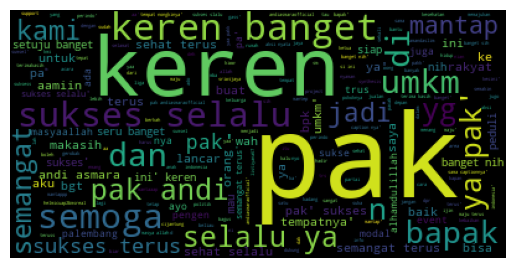

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['text'].values
text=[i.lower() for i in text]
k=['pak','keren','banget']
while(k in text):
    text.remove(k)
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()